# Acoustic Extinguisher Fire Prediction

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_excel('/content/Acoustic_Extinguisher_Fire_Dataset.xlsx')

## Exploratory Data Analysis

In [3]:
df.head(5)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [4]:
df.shape

(17442, 7)

In [5]:
df.size

122094

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SIZE,17442.0,3.411765,1.750977,1.0,2.0,3.0,5.0,7.0
DISTANCE,17442.0,100.000000,54.773826,10.0,50.0,100.0,150.0,190.0
DESIBEL,17442.0,96.379142,8.164096,72.0,90.0,95.0,104.0,113.0
AIRFLOW,17442.0,6.975634,4.736169,0.0,3.2,5.8,11.2,17.0
FREQUENCY,17442.0,31.611111,20.939149,1.0,14.0,27.5,47.0,75.0
STATUS,17442.0,0.497821,0.500010,0.0,0.0,0.0,1.0,1.0


In [8]:
df.isnull().sum()

,0
SIZE,0
FUEL,0
DISTANCE,0
DESIBEL,0
AIRFLOW,0
FREQUENCY,0
STATUS,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

,0
SIZE,7
FUEL,4
DISTANCE,19
DESIBEL,39
AIRFLOW,127
FREQUENCY,54
STATUS,2


In [11]:
fuel_type = df['FUEL'].unique()
size_type = df['SIZE'].unique()
distance_type = df['DISTANCE'].unique()
desibel_type = df['DESIBEL'].unique()
frequency_type = df['FREQUENCY'].unique()

print(f'Fuel Type: {fuel_type}')
print('')
print(f'Size Type: {size_type}')
print('')
print(f'Distance Type: {distance_type}')
print('')
print(f'Desibel Type: {desibel_type}')
print('')
print(f'Frequency Type: {frequency_type}')

Fuel Type: ['gasoline' 'thinner' 'kerosene' 'lpg']

Size Type: [1 2 3 4 5 6 7]

Distance Type: [ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190]

Desibel Type: [ 96 109 103  95 102  93 110 111 105 106 108 107  90  92  91  88  85  83
  75 104 112 113  89 100  87  80  78  76 101  86  97  94  84  82  98  79
  74  99  72]

Frequency Type: [75 72 70 68 67 66 65 60 55 52 51 50 48 47 46 45 44 42 40 38 36 35 34 33
 32 30 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7
  6  5  4  3  2  1]


## Data Visualization

<Figure size 1200x600 with 0 Axes>

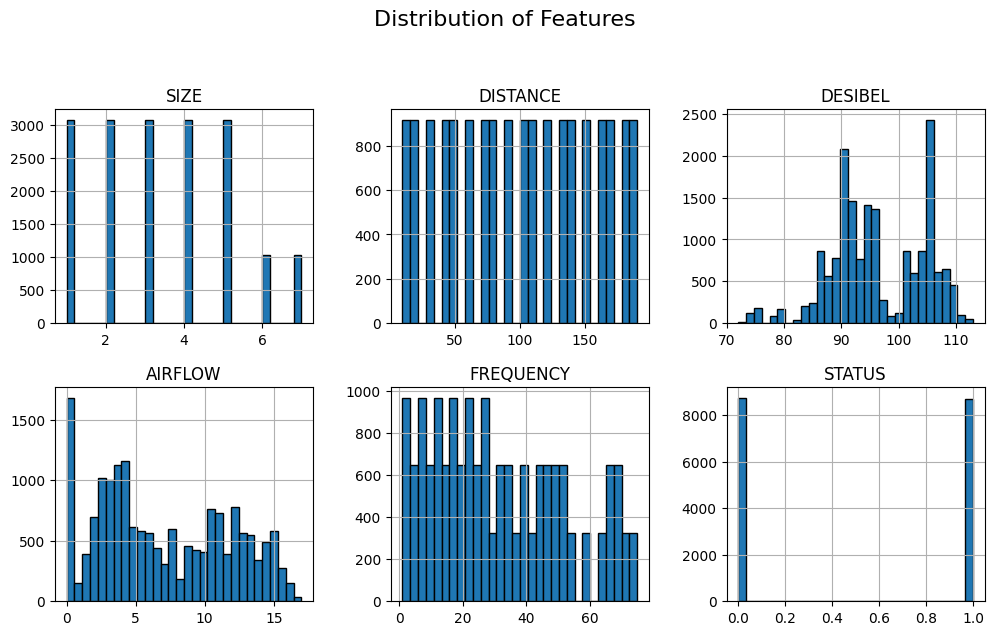

In [12]:
# Distribution of Numeric Features

plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 10), bins=30, edgecolor='black', layout=(3, 3))
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()

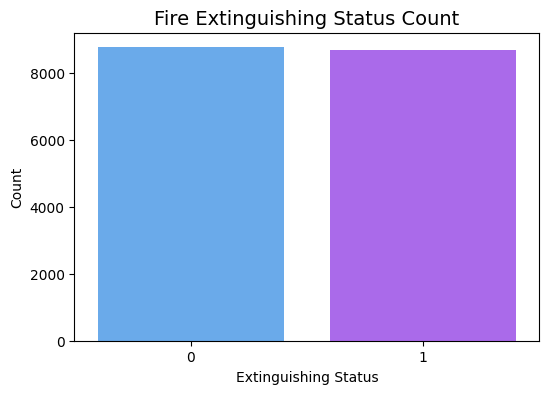

In [13]:
# Count of Fire Status (Prediction Outcome)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='STATUS', palette='cool')
plt.title('Fire Extinguishing Status Count', fontsize=14)
plt.xlabel('Extinguishing Status')
plt.ylabel('Count')
plt.show()

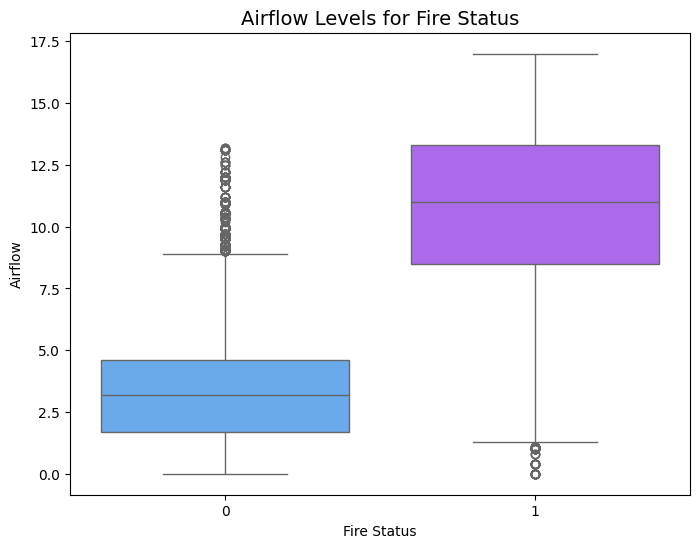

In [14]:
# Boxplot for AIRFLOW vs. STATUS

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='STATUS', y='AIRFLOW', palette='cool')
plt.title('Airflow Levels for Fire Status', fontsize=14)
plt.xlabel('Fire Status')
plt.ylabel('Airflow')
plt.show()

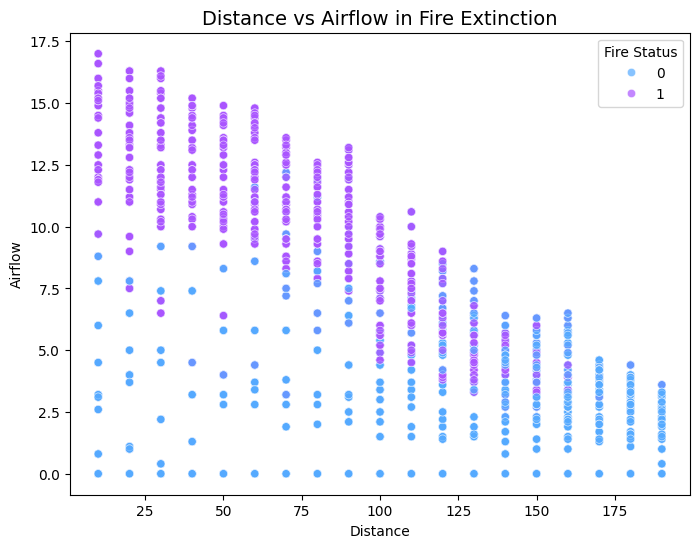

In [15]:
# Relationship Between Distance and Airflow

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='DISTANCE', y='AIRFLOW', hue='STATUS', palette='cool', alpha=0.7)
plt.title('Distance vs Airflow in Fire Extinction', fontsize=14)
plt.xlabel('Distance')
plt.ylabel('Airflow')
plt.legend(title='Fire Status')
plt.show()

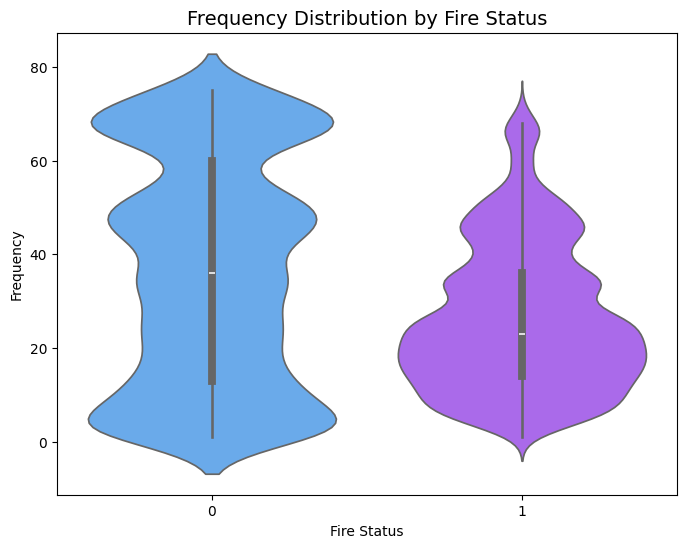

In [16]:
#  Violin Plot for FREQUENCY vs. STATUS

plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='STATUS', y='FREQUENCY', palette='cool')
plt.title('Frequency Distribution by Fire Status', fontsize=14)
plt.xlabel('Fire Status')
plt.ylabel('Frequency')
plt.show()

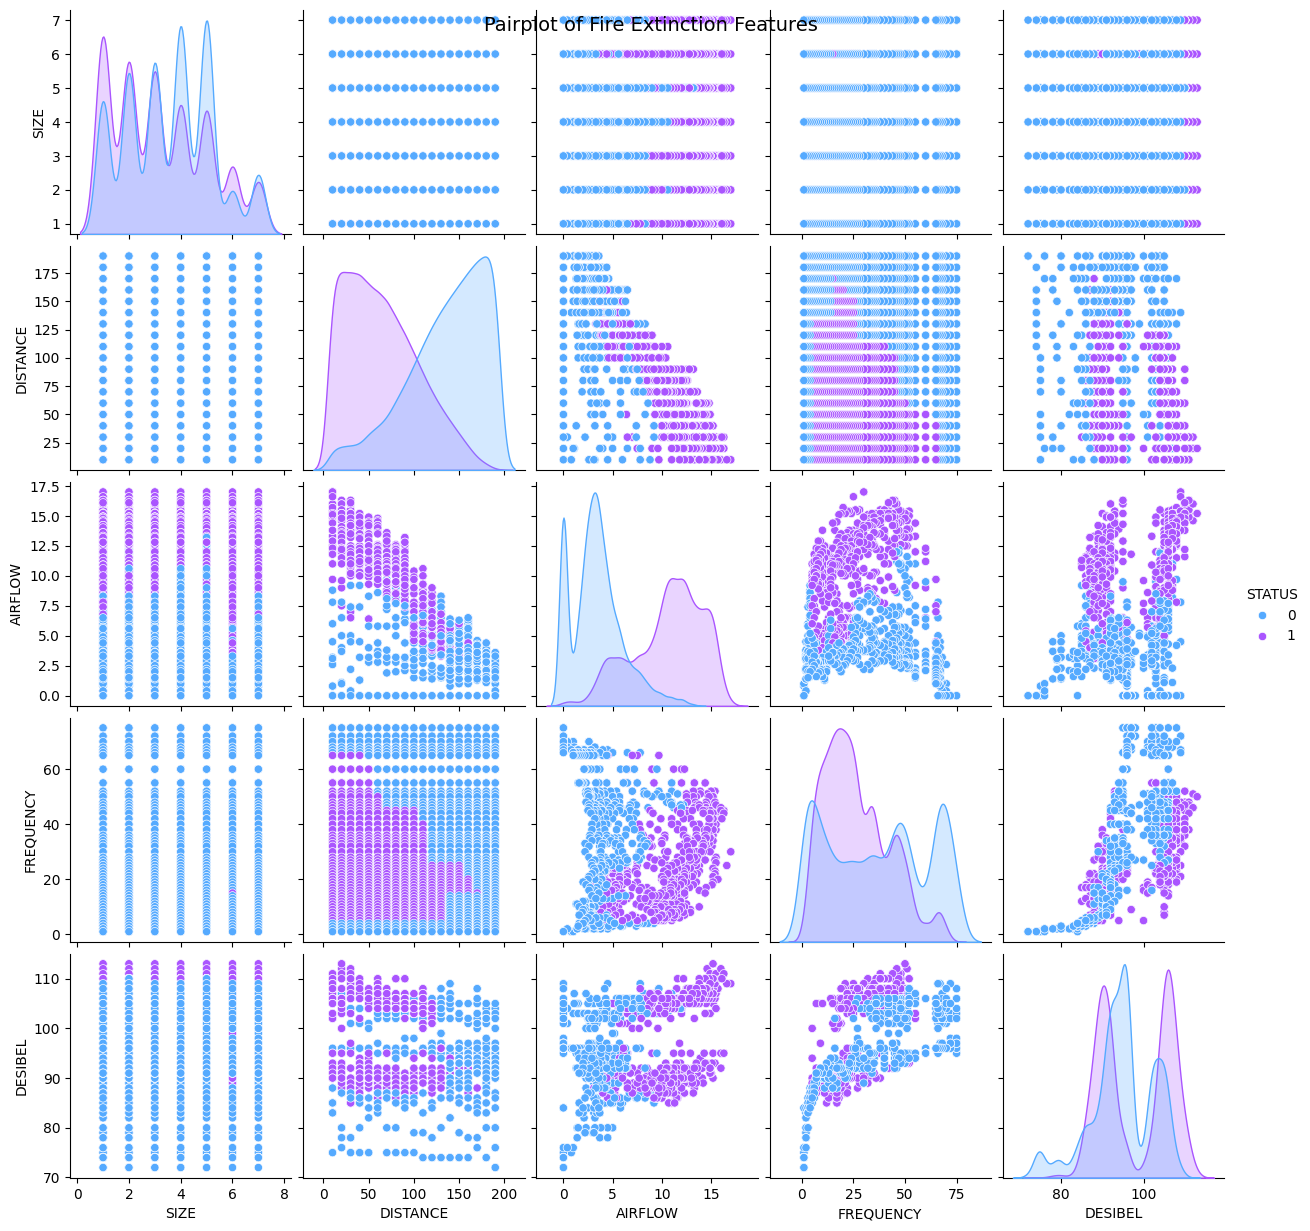

In [17]:
# Pairplot to Identify Patterns

sns.pairplot(df, vars=['SIZE', 'DISTANCE', 'AIRFLOW', 'FREQUENCY', 'DESIBEL'], hue='STATUS', palette='cool')
plt.suptitle('Pairplot of Fire Extinction Features', fontsize=14)
plt.show()

## Data Preprocessing

In [18]:
# Converting categorical data into numerical data

df = pd.get_dummies(df)

In [19]:
X = df.drop('STATUS', axis=1)
y = df['STATUS']

In [20]:
# Train test and split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Data Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building

In [22]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [23]:
Linear_reg = LinearRegression(),
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()

In [24]:
model_li = [Ride_reg,XGBoost,Random_forest,Ada_boost,Grad_boost,Bagging]

Score =[]
for model in model_li:
    model.fit(X_train,y_train)
    Score.append(r2_score(y_test,model.predict(X_test)))

Score

[0.6507415704371122,
 0.8922584056854248,
 0.9213472391079265,
 0.6570258632729169,
 0.7918198556870606,
 0.9137942281460055]

In [25]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    threshold = 0.5
    y_pred_binary = np.where(y_pred > threshold, 1, 0)
    Score.append(accuracy_score(y_test, y_pred_binary))

Score

[0.8945256520492978,
 0.9716251074806534,
 0.9744912582401835,
 0.9005445686443107,
 0.94067067927773,
 0.9713384924047005]

## Model Prediction

In [26]:
# R2 Score

XGBoost_Model = XGBoost.fit(X_train,y_train)
print("The R2 score of XG Boost: ",r2_score(y_test,XGBoost.predict(X_test)))

The R2 score of XG Boost:  0.8922584056854248


In [27]:
# Accuracy Score

XGBoost_Model = XGBoost.fit(X_train, y_train)
y_pred = XGBoost_Model.predict(X_test)
threshold = 0.5
y_pred_binary = np.where(y_pred > threshold, 1, 0)
accuracy = accuracy_score(y_test, y_pred_binary)
print("The accuracy of XG Boost: ", accuracy)

The accuracy of XG Boost:  0.9716251074806534
